# **GMM**

**Elaborated By: Sirine MAAROUFI**

---
## **Introduction**
---

In this exercise, we aim to perform clustering using the Gaussian Mixture Model (GMM) on a dataset of wholesale customer spending. The dataset includes various categories of spending, such as on fresh products, milk, grocery items, etc. The goal is to group the customers into clusters based on their purchasing behavior.

Clustering is an unsupervised learning technique that aims to find natural groupings in the data. Unlike k-means clustering, GMM allows for soft clustering, where each data point can belong to multiple clusters with different probabilities. This makes GMM a powerful method for dealing with complex datasets where the clusters may overlap.

In this exercise, we will:

**1. Load and preprocess the data:** Clean the dataset and normalize the features for better performance.

**2. Determine the optimal number of clusters:** Use statistical criteria such as BIC (Bayesian Information Criterion), AIC (Akaike Information Criterion), and the Likelihood Ratio Test (LRT) to select the optimal number of clusters.

**3. Fit the GMM and make predictions:** Apply the GMM to cluster the data and predict cluster memberships for each data point.

**4. Visualize the results:** Create scatter plots to visualize the clusters and understand the segmentation patterns.

---
## **Step 1: Importing the necessary libraries**
---

In [135]:
import pandas as pd
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting style
sns.set(style="whitegrid")


In [136]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


---
## **Step 2: Loading the Data**
---
The dataset is loaded from an Excel file, and we start by displaying its structure to understand the different features. The 'Channel' column, which is not relevant for clustering, is removed.

In [137]:
# Load the data
data = pd.read_excel('Wholesale customers data.xlsx')

In [138]:
# Display the first few rows of the dataset
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [139]:
# Drop the 'Channel' column as it's not needed for clustering
data = data.drop(columns='Channel')

In [140]:
# Display the dataset again to confirm the column has been removed
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


---
## **Step 3: Data Normalization**
---
To ensure that all features contribute equally to the clustering process, we normalize the data using `StandardScaler`, which transforms each feature to have zero mean and unit variance. This step is crucial because the features have different scales of measurement.



In [141]:
# Apply StandardScaler normalization
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

In [142]:
# Display the normalized data
data_normalized

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

---
## **Step 4: Finding the Optimal Number of Clusters**
---
### **Method 1: BIC (Bayesian Information Criterion) and AIC (Akaike Information Criterion)**
BIC and AIC are statistical criteria used to evaluate model quality while penalizing for complexity. We compute these metrics for different numbers of clusters (from 1 to 10) to find the optimal number that balances model fit and complexity.

The results are plotted to visualize the BIC and AIC scores as a function of the number of clusters, helping to identify the cluster count that minimizes these scores.

The optimal number of clusters according to BIC and AIC is then used to fit the GMM.

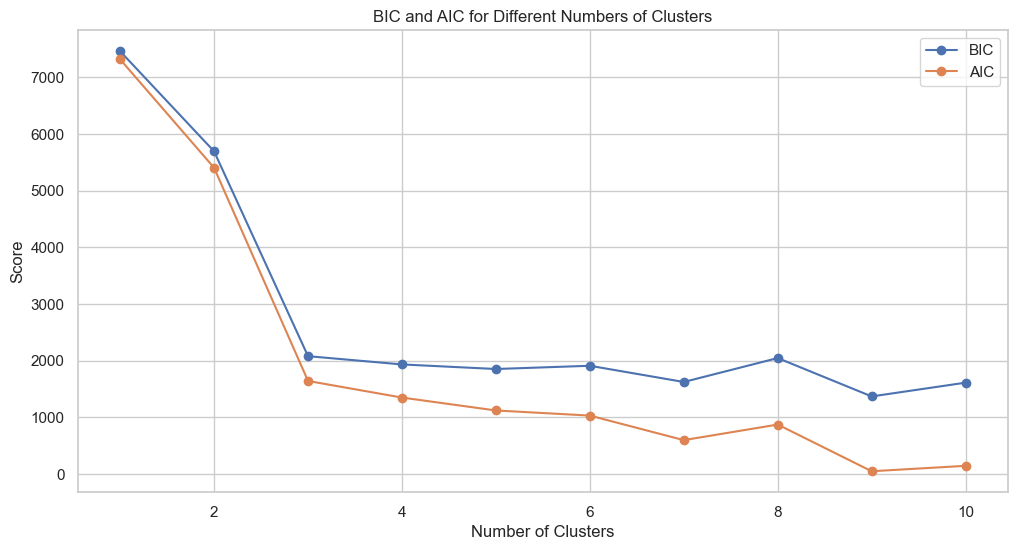

Optimal number of clusters according to BIC: 9
Optimal number of clusters according to AIC: 9


In [143]:
# Define the range of cluster numbers to try (from 1 to 10)
n_clusters_range = range(1, 11)

# Lists to store BIC and AIC scores for each number of clusters
bic_scores = []
aic_scores = []

# Compute BIC and AIC for each number of clusters
for n_clusters in n_clusters_range:
    # Fit a Gaussian Mixture Model with the current number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(data_normalized)
    
    # Append the BIC and AIC scores to their respective lists
    bic_scores.append(gmm.bic(data_normalized))
    aic_scores.append(gmm.aic(data_normalized))


# Create a plot to visualize how BIC and AIC change with the number of clusters
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, bic_scores, label='BIC', marker='o')
plt.plot(n_clusters_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC and AIC for Different Numbers of Clusters')
plt.legend()
plt.show()

# Find the number of clusters corresponding to the minimum BIC and AIC scores
optimal_clusters_bic = n_clusters_range[np.argmin(bic_scores)]
optimal_clusters_aic = n_clusters_range[np.argmin(aic_scores)]

# Print the optimal number of clusters based on BIC and AIC
print(f'Optimal number of clusters according to BIC: {optimal_clusters_bic}')
print(f'Optimal number of clusters according to AIC: {optimal_clusters_aic}')

### **Method 2: Likelihood Ratio Test (LRT)**
LRT is another method to determine the optimal number of clusters. It compares models with consecutive numbers of clusters to check whether adding an additional cluster significantly improves the fit. The test results in a p-value, which is used to assess the significance of the improvement. We choose the largest number of clusters where the p-value is below the significance threshold (0.05).

In [144]:
# Set the maximum number of clusters to test
max_clusters = 10
lrt_p_values = []

# Perform LRT for models with different numbers of clusters
for k in range(1, max_clusters):
    # Fit GMM with k and k+1 components
    gmm_k = GaussianMixture(n_components=k, random_state=42)
    gmm_k_next = GaussianMixture(n_components=k + 1, random_state=42)

    gmm_k.fit(data_normalized)
    gmm_k_next.fit(data_normalized)

    # Calculate the log-likelihoods for both models
    log_likelihood_k = gmm_k.score(data_normalized) * data_normalized.shape[0]
    log_likelihood_k_next = gmm_k_next.score(data_normalized) * data_normalized.shape[0]

    # Perform LRT: Calculate the test statistic
    lrt_stat = 2 * (log_likelihood_k_next - log_likelihood_k)
    # Degrees of freedom = difference in the number of parameters
    d = data_normalized.shape[1]
    df = (k + 1) * (d + 1) - k * (d + 1)
    # Calculate the p-value for the test statistic
    p_value = 1 - chi2.cdf(lrt_stat, df)
    lrt_p_values.append(p_value)

# Find the largest number of clusters where the LRT is significant (p-value < 0.05)
significance_level = 0.05
optimal_clusters = None

for k, p_value in enumerate(lrt_p_values, start=1):
    if p_value < significance_level:
        optimal_clusters = k + 1  # Adding 1 because LRT compares k vs. k+1 clusters

# Print the optimal number of clusters according to LRT
print(f'Optimal number of clusters according to LRT: {optimal_clusters}')

Optimal number of clusters according to LRT: 9


---
## **Step 5: Fitting the GMM and Making Predictions**
---
We fit the GMM using the optimal number of clusters obtained from BIC, AIC, or LRT. The model predicts the cluster assignments for each data point, which are then added to the original dataset. This step allows us to analyze the clustering patterns more effectively.



In [145]:
# Fit the GMM model again with the optimal number of clusters determined by LRT
n_clusters = 9
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the model on the normalized data
gmm.fit(data_normalized)

# Predict the clusters for each data point
clusters = gmm.predict(data_normalized)

# Update the original data with the new cluster labels
data['Cluster'] = clusters

---
## **Step 6: Visualizing the Clustering Results**
---
Scatter plots are used to visualize the clusters in two-dimensional space, focusing on spending in categories like fresh products and milk. The colors in the plots represent the different clusters, allowing for easy identification of customer segments with distinct spending behaviors.



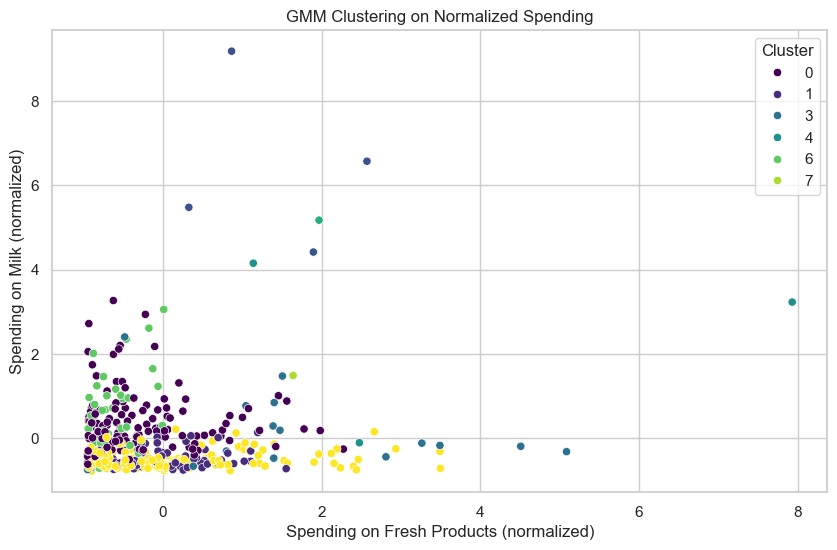

In [146]:
# Create a scatter plot to visualize the final clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_normalized[:, 1], y=data_normalized[:, 2], hue=clusters, palette='viridis')
plt.title('GMM Clustering on Normalized Spending')
plt.xlabel('Spending on Fresh Products (normalized)')
plt.ylabel('Spending on Milk (normalized)')
plt.legend(title='Cluster')
plt.show()

---
## **Conclusion**
---
In this exercise, we successfully applied the Gaussian Mixture Model for clustering wholesale customer data. By utilizing statistical methods such as BIC, AIC, and LRT, we determined the optimal number of clusters, providing a robust approach for customer segmentation. 

---
## **Refrences**
--- 
* [In Depth: Gaussian Mixture Models](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html) 
* [Understanding Gaussian Mixture Models: A Comprehensive Guide](https://medium.com/@juanc.olamendy/understanding-gaussian-mixture-models-a-comprehensive-guide-df30af59ced7)